In [1]:
import dimelo as dm
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import pysam
import time

In [2]:
import sys
print(sys.executable)

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/bin/python


In [3]:
# stuff for the dimelo dev testing

combined_bam_filepath = '/clusterfs/nilah/oberon/downloads/prod_CTCF_winnowmap_guppy_merge.sorted.bam'
megalodon_bam_filepath = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.sorted.bam'
two_color_r9 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/lmnb1-accessibility_20220214_megalodon/barcode10_rabbit-abcam/mod_mappings.10.sorted.bam'
test_r10 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/r10/Dorado_R10_calls_chm13v1.1.sorted_calmd.bam'
hp1_bam_filepath = '/clusterfs/nilah/oberon/downloads/phased/ALLCTCF_guppy_winnowmap_merge_chr11_NanoMethPhase_HP1.bam'
hp2_bam_filepath = '/clusterfs/nilah/oberon/downloads/phased/ALLCTCF_guppy_winnowmap_merge_chr11_NanoMethPhase_HP2.bam'
pacbio_ctcf_filepath = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/PacBio/pacbio_ctcf_q10.strandify.ipr.aligned.bam'
pacbio_untreated_filepath = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/PacBio/pacbio_untreated_q10.strandify.ipr.aligned.bam'
output_dir = '/clusterfs/nilah/oberon/dimelo_dev_source/test_outputs/'
sql_output = 'test_output'
hp1_sample_name = 'gm12878_ctcf_hp1'
genome_path = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/genomes/chm13.draft_v1.0.fasta'
v1_1_genome_path = '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta'
hg38_genome_path = '/clusterfs/nilah/ayesha/basenji/baselines/gm12878/data/hg38.fa'



In [4]:
start_time = time.time()
(pile_coordinates,valid_pile_dict,modified_pile_dict) = dm.parse_bam(
    megalodon_bam_filepath,
    'test',output_dir,
    basemods=('N:A+m:N','N:C+m:G','G:C+m:N'),
    context_check_source = 'both',
    bedFile='/clusterfs/nilah/oberon/dimelo_dev_source/dimelo/dimelo/test/data/test-large-regions.bed',
    checkAgainstRef=True,
    pipeline='nanopore_megalodon',
    thresholds=[128,128],
    referenceGenome=genome_path)
end_time = time.time()
print(end_time-start_time)
# print('max CpGs depth',max(valid_pile_dict['N:C+m:G']),
#       'average As depth',
#       sum([element for element in valid_pile_dict['N:A+m:N'] if element>1])
#       /len([element for element in valid_pile_dict['N:A+m:N'] if element>1]))

Parsing windows: 100%|██████████| 4/4 [00:04<00:00,  1.00s/windows]


total and per core: 962395848 31045028
{0: {<dimelo.parse_bam.Region object at 0x2afa0446bfd0>: [(<dimelo.parse_bam.Region object at 0x2afa04475610>, 'first')]}, 1: {<dimelo.parse_bam.Region object at 0x2afa0446bfd0>: [(<dimelo.parse_bam.Region object at 0x2afa044755d0>, 'internal')]}, 2: {<dimelo.parse_bam.Region object at 0x2afa0446bfd0>: [(<dimelo.parse_bam.Region object at 0x2afa044753d0>, 'last')], <dimelo.parse_bam.Region object at 0x2af88b732910>: [(<dimelo.parse_bam.Region object at 0x2afa04475650>, 'first')]}, 3: {<dimelo.parse_bam.Region object at 0x2af88b732910>: [(<dimelo.parse_bam.Region object at 0x2afa04475250>, 'internal')]}, 4: {<dimelo.parse_bam.Region object at 0x2af88b732910>: [(<dimelo.parse_bam.Region object at 0x2afa044754d0>, 'internal')]}, 5: {<dimelo.parse_bam.Region object at 0x2af88b732910>: [(<dimelo.parse_bam.Region object at 0x2afa04475750>, 'internal')]}, 6: {<dimelo.parse_bam.Region object at 0x2af88b732910>: [(<dimelo.parse_bam.Region object at 0x2afa0

KeyboardInterrupt: 

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


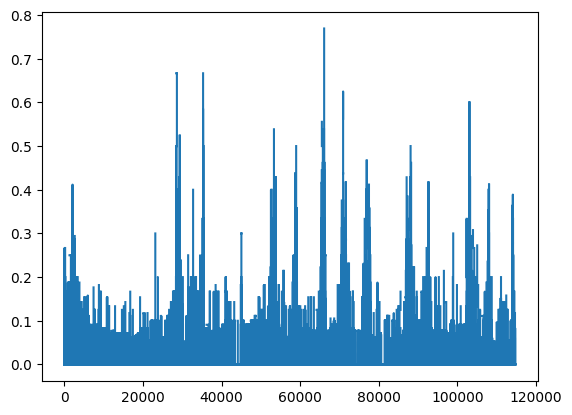

In [7]:
plt.plot(modified_pile_dict['N:A+m:N']/valid_pile_dict['N:A+m:N'])

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


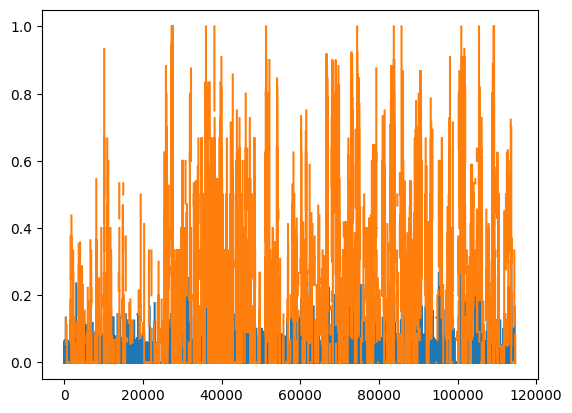

In [11]:
plt.plot(modified_pile_dict['G:C+m:N']/valid_pile_dict['G:C+m:N'])
plt.plot(modified_pile_dict['N:C+m:G']/valid_pile_dict['N:C+m:G'])

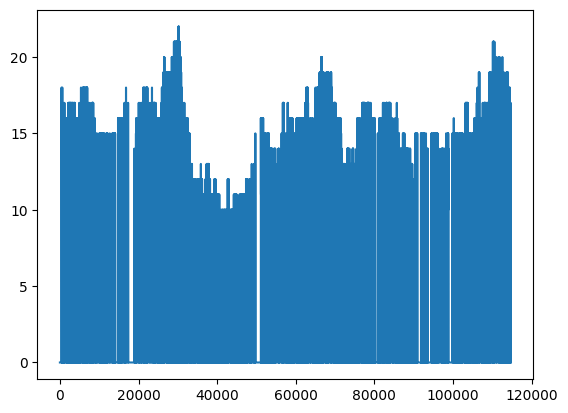

In [8]:
plt.plot(valid_pile_dict['N:C+m:G'])

In [16]:
print(sum(valid_pile_dict['N:A+m:N'])/len(valid_pile_dict['N:A+m:N']))

5.978868756975446


/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


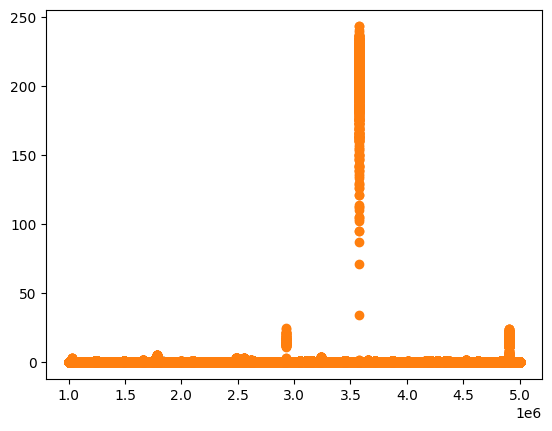

In [10]:
plt.scatter(pile_coordinates,modified_pile_dict['N:C+m:G']/valid_pile_dict['N:C+m:G'])
plt.scatter(pile_coordinates,valid_pile_dict['N:A+m:N'])

mA plots and comparisons

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


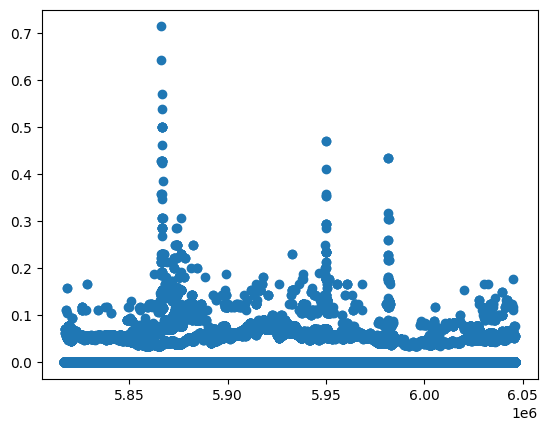

In [10]:
plt.scatter(pile_coordinates,modified_pile_dict['N:A+m:N']/(valid_pile_dict['N:A+m:N']))

In [17]:
print(valid_pile_dict['N:A+m:N'])

[21.  0. 21. ...  0. 14.  0.]


In [6]:
baseline_output_dir = '/clusterfs/nilah/oberon/dimelo_dev_source/test_outputs/baseline'
megalodon_sample_name = 'gm12878_ctcf_megalodon'
aggregated_counts = pd.read_sql("SELECT * from methylationAggregate_" + megalodon_sample_name, 
                        sqlite3.connect(baseline_output_dir + "/" + megalodon_bam_filepath.split("/")[-1]
                                        .replace(".bam", "") + ".db"))

In [7]:
a_counts = aggregated_counts[aggregated_counts['mod']=='A+Y'].sort_values(by='pos',ascending=True)

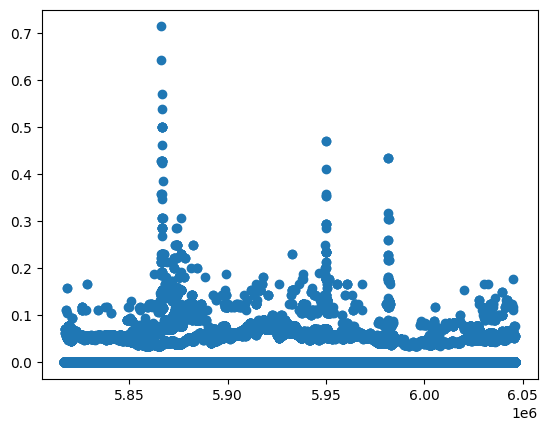

In [8]:
# plt.figure(figsize=(10,2.5))
plt.scatter(a_counts['pos'],a_counts['methylated_bases']/a_counts['total_bases'])

In [9]:
print(len(a_counts['methylated_bases']),len(modified_pile_dict['N:A+m:N']))

143442 229376


In [11]:
baseline_coordinates = {x:y for x,y in zip(a_counts['pos'],a_counts['methylated_bases']/a_counts['total_bases'])}
new_package_coordinates = {x:y for x,y in zip(pile_coordinates,modified_pile_dict['N:A+m:N']/(valid_pile_dict['N:A+m:N']))}

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [12]:
diff_by_coordinates = {x:new_package_coordinates[x]-baseline_coordinates[x] for x in baseline_coordinates if x in new_package_coordinates}

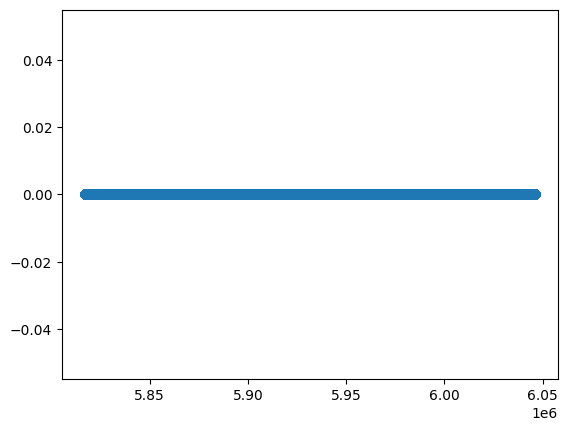

In [14]:
plt.scatter(diff_by_coordinates.keys(),diff_by_coordinates.values())

In [18]:
print(len(diff_by_coordinates))

143442


/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


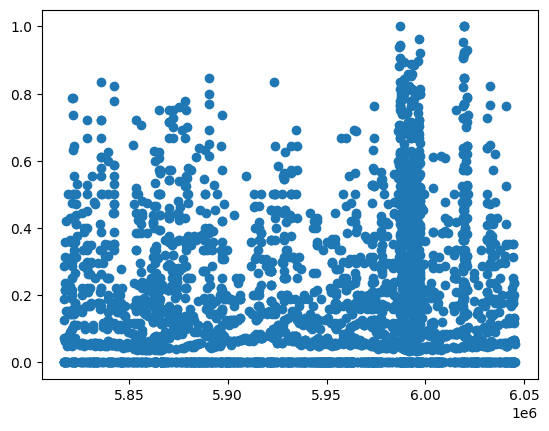

In [25]:
plt.scatter(pile_coordinates,modified_pile_dict['N:C+m:G']/(valid_pile_dict['N:C+m:G']))

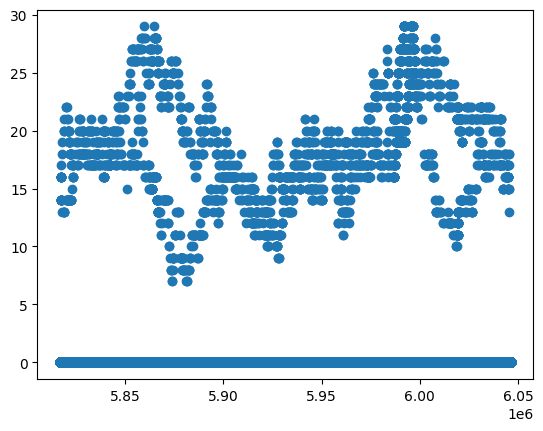

In [26]:
plt.scatter(pile_coordinates,valid_pile_dict['N:C+m:G'])

In [20]:
c_counts = aggregated_counts[aggregated_counts['mod']=='C+Z'].sort_values(by='pos',ascending=True)

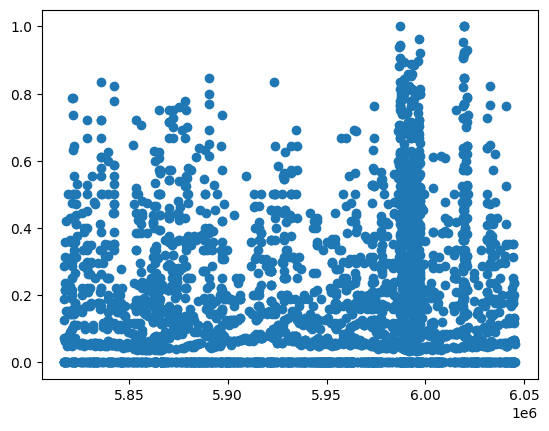

In [21]:
plt.scatter(c_counts['pos'],c_counts['methylated_bases']/c_counts['total_bases'])

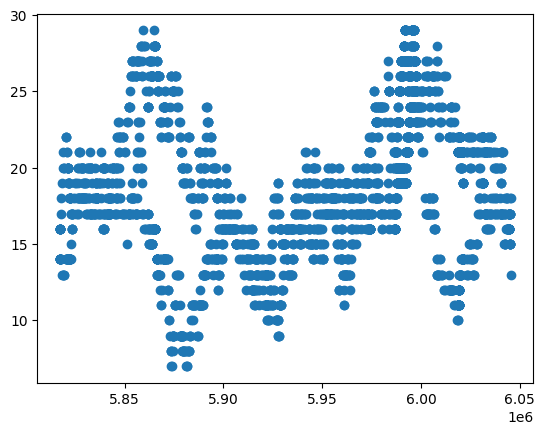

In [27]:
plt.scatter(c_counts['pos'],c_counts['total_bases'])

In [28]:
c_baseline_coordinates = {x:y for x,y in zip(c_counts['pos'],c_counts['methylated_bases']/c_counts['total_bases'])}
c_new_package_coordinates = {x:y for x,y in zip(pile_coordinates,modified_pile_dict['N:C+m:G']/(valid_pile_dict['N:C+m:G']))}

/global/home/users/dixonluinenburg/.conda/envs/dimelo_arbitrary_basemod_dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [29]:
c_diff_by_coordinates = {x:c_new_package_coordinates[x]-c_baseline_coordinates[x] 
                       for x in c_baseline_coordinates if x in c_new_package_coordinates}

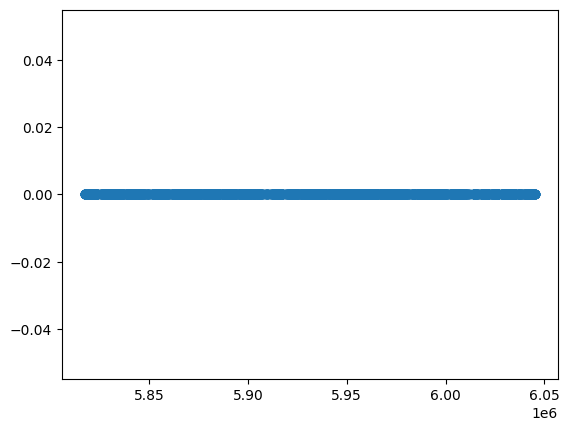

In [30]:
plt.scatter(c_diff_by_coordinates.keys(),c_diff_by_coordinates.values())

In [8]:
start_time = time.time()
(hp1_pile_coordinates,hp1_valid_pile_dict,hp1_modified_pile_dict) = dm.parse_bam(
    hp1_bam_filepath,
    'test',output_dir,
    basemods=('N:A+m:N','N:C+m:G'),
    region='chr11:5816896-6046272',
    referenceGenome=genome_path)
end_time = time.time()
print(end_time-start_time)

chr11 5816896 6046272
5816896 6046271
read pos 5835500
9.660791873931885
